In [1]:
#library loading
import pandas as pd
from google.cloud import bigquery
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

%matplotlib inline
mpl.rcParams["axes.unicode_minus"] = False
mpl.rcParams["font.family"] = "D2Coding"
warnings.filterwarnings(action="ignore")

In [2]:
client = bigquery.Client()

In [3]:
[i.dataset_id for i in client.list_datasets()]

['austin_311',
 'austin_bikeshare',
 'austin_crime',
 'austin_incidents',
 'austin_waste',
 'baseball',
 'bitcoin_blockchain',
 'bls',
 'bls_qcew',
 'catalonian_mobile_coverage',
 'catalonian_mobile_coverage_eu',
 'census_bureau_acs',
 'census_bureau_construction',
 'census_bureau_international',
 'census_bureau_usa',
 'census_utility',
 'cfpb_complaints',
 'chicago_crime',
 'chicago_taxi_trips',
 'cloud_storage_geo_index',
 'cms_codes',
 'cms_medicare',
 'cms_synthetic_patient_data_omop',
 'covid19_ecdc',
 'covid19_google_mobility',
 'covid19_google_mobility_eu',
 'covid19_govt_response',
 'covid19_italy',
 'covid19_italy_eu',
 'covid19_jhu_csse',
 'covid19_jhu_csse_eu',
 'covid19_nyt',
 'covid19_usafacts',
 'crypto_bitcoin',
 'crypto_bitcoin_cash',
 'crypto_dash',
 'crypto_dogecoin',
 'crypto_ethereum',
 'crypto_ethereum_classic',
 'crypto_litecoin',
 'crypto_zcash',
 'eclipse_megamovie',
 'epa_historical_air_quality',
 'ethereum_blockchain',
 'faa',
 'fcc_political_ads',
 'fda_drug'

In [4]:
dataset = client.get_dataset(client.dataset("covid19_google_mobility"))
dataset

Dataset(DatasetReference('bigquery-public-data', 'covid19_google_mobility'))

In [5]:
for i in client.list_tables(dataset):
    print(i.table_id)

mobility_report


In [6]:
table = client.get_table(dataset.table("mobility_report"))
table

Table(TableReference(DatasetReference('bigquery-public-data', 'covid19_google_mobility'), 'mobility_report'))

In [7]:
df = client.list_rows(table).to_dataframe()

In [8]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,None,None,2020-04-05,-61.0,-30.0,-58.0,-79.0,-57.0,31.0
1,AE,United Arab Emirates,None,None,2020-04-06,-63.0,-32.0,-58.0,-78.0,-56.0,30.0
2,AE,United Arab Emirates,None,None,2020-04-07,-63.0,-30.0,-73.0,-78.0,-55.0,30.0
3,AE,United Arab Emirates,None,None,2020-04-08,-63.0,-30.0,-74.0,-78.0,-55.0,30.0
4,AE,United Arab Emirates,None,None,2020-04-09,-64.0,-31.0,-76.0,-79.0,-55.0,33.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458565 entries, 0 to 458564
Data columns (total 11 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 458565 non-null  object 
 1   country_region                                      458565 non-null  object 
 2   sub_region_1                                        445233 non-null  object 
 3   sub_region_2                                        265611 non-null  object 
 4   date                                                458565 non-null  object 
 5   retail_and_recreation_percent_change_from_baseline  358425 non-null  float64
 6   grocery_and_pharmacy_percent_change_from_baseline   345821 non-null  float64
 7   parks_percent_change_from_baseline                  212781 non-null  float64
 8   transit_stations_percent_change_from_baseline       244044 non-n

In [10]:
print(dataset.description)

Terms of use
By downloading or using the data, you agree to Google's Terms of Service: https://policies.google.com/terms

Description
This dataset aims to provide insights into what has changed in response to policies aimed at combating COVID-19. It reports movement trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential.

This dataset is intended to help remediate the impact of COVID-19. It shouldn’t be used for medical diagnostic, prognostic, or treatment purposes. It also isn’t intended to be used for guidance on personal travel plans.

To learn more about the dataset, the place categories, and how we calculate these trends and preserve privacy, do the following:

• Visit the help center: https://support.google.com/covid19-mobility.

• Or, read the dataset documentation: https://www.google.com/covid19/mobility/data_documentation.html.


In [11]:
for i in table.schema :
    print(i.name, ":", i.description)
    print("===============================")

country_region_code : 2 letter alpha code for the country/region in which changes are measured relative to the baseline. These values correspond with the ISO 3166-1 alpha-2 codes
country_region : The country/region in which changes are measured relative to the baseline
sub_region_1 : First geographic sub-region in which the data is aggregated. This varies by country/region to ensure privacy and public health value in consultation with local public health authorities
sub_region_2 : Second geographic sub-region in which the data is aggregated. This varies by country/region to ensure privacy and public health value in consultation with local public health authorities
date : Changes for a given date as compared to baseline. Baseline is the median value, for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020.
retail_and_recreation_percent_change_from_baseline : Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, a

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458565 entries, 0 to 458564
Data columns (total 11 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 458565 non-null  object 
 1   country_region                                      458565 non-null  object 
 2   sub_region_1                                        445233 non-null  object 
 3   sub_region_2                                        265611 non-null  object 
 4   date                                                458565 non-null  object 
 5   retail_and_recreation_percent_change_from_baseline  358425 non-null  float64
 6   grocery_and_pharmacy_percent_change_from_baseline   345821 non-null  float64
 7   parks_percent_change_from_baseline                  212781 non-null  float64
 8   transit_stations_percent_change_from_baseline       244044 non-n

In [13]:
df.nunique()

country_region_code                                    132
country_region                                         132
sub_region_1                                          1845
sub_region_2                                          1715
date                                                   101
retail_and_recreation_percent_change_from_baseline     258
grocery_and_pharmacy_percent_change_from_baseline      266
parks_percent_change_from_baseline                     435
transit_stations_percent_change_from_baseline          277
workplaces_percent_change_from_baseline                210
residential_percent_change_from_baseline                70
dtype: int64

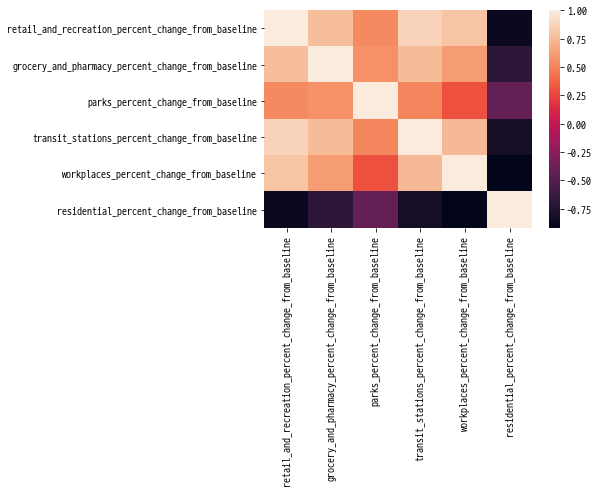

In [14]:
sns.heatmap(df.corr())

In [15]:
df["date"].head()

0    2020-04-05
1    2020-04-06
2    2020-04-07
3    2020-04-08
4    2020-04-09
Name: date, dtype: object

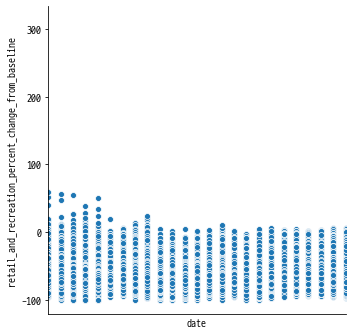

In [16]:
G = sns.relplot(x="date", y="retail_and_recreation_percent_change_from_baseline", data=df)
G.set(xticks=range(1,25), xlim=(datetime.date(2020,4,1), datetime.date(2020,4,25)), xticklabels=range(1,25))
plt.show()

In [17]:
df.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [18]:
df1 = df.melt(id_vars=df.columns[0:5], value_vars=df.columns[5:], var_name="category", value_name="value")

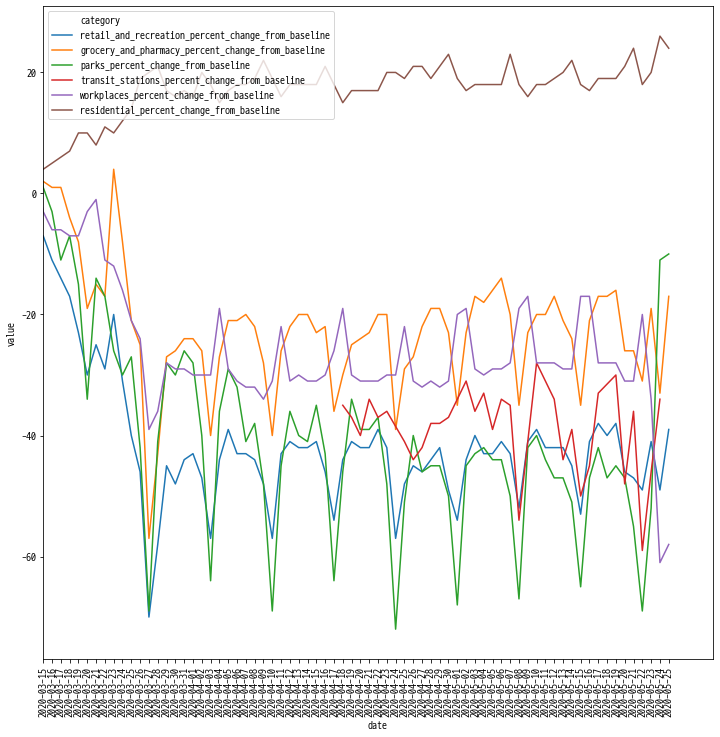

In [19]:
# 그래프를 그리는 메인 함수를 제외하고 legend, ticks, size 등은 plt의 함수를 호출하는게 더 유리하다
# xlim, ylim, xticks : ggplot의 scaling
plt.figure(figsize=(12, 12))
G = sns.lineplot(x="date", y="value", hue="category",
                 data=df1[df1["sub_region_1"] == "Fujairah"])
G.set(xticks=np.sort(df1[df1["sub_region_1"] == "Fujairah"]["date"].unique(
)), xlim=(datetime.date(2020, 3, 15), datetime.date(2020, 5, 30)))
plt.xticks(rotation=90)
G.legend(loc="upper left")
#plt.legend(loc="upper left")
plt.show()

In [20]:
df1.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,category,value
0,AE,United Arab Emirates,None,None,2020-04-05,retail_and_recreation_percent_change_from_base...,-61.0
1,AE,United Arab Emirates,None,None,2020-04-06,retail_and_recreation_percent_change_from_base...,-63.0
2,AE,United Arab Emirates,None,None,2020-04-07,retail_and_recreation_percent_change_from_base...,-63.0
3,AE,United Arab Emirates,None,None,2020-04-08,retail_and_recreation_percent_change_from_base...,-63.0
4,AE,United Arab Emirates,None,None,2020-04-09,retail_and_recreation_percent_change_from_base...,-64.0


In [22]:
len(df["country_region"].unique())

132

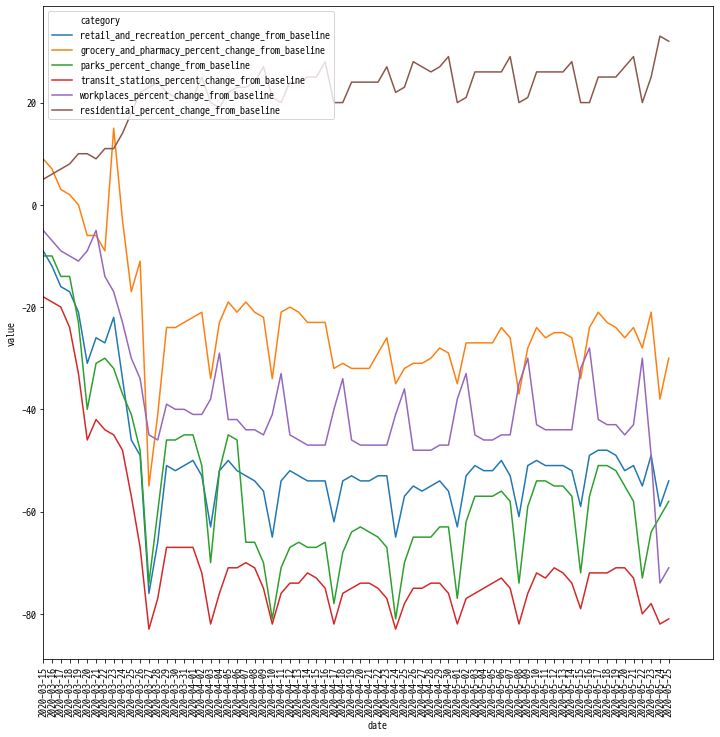

In [27]:
# 그래프를 그리는 메인 함수를 제외하고 legend, ticks, size 등은 plt의 함수를 호출하는게 더 유리하다
# xlim, ylim, xticks : ggplot의 scaling
plt.figure(figsize=(12, 12))
G = sns.lineplot(x="date", y="value", hue="category",
                 data=df1[df1["sub_region_1"] == "Abu Dhabi"])
G.set(xticks=np.sort(df1[df1["sub_region_1"] == "Abu Dhabi"]["date"].unique(
)), xlim=(datetime.date(2020, 3, 15), datetime.date(2020, 5, 30)))
plt.xticks(rotation=90)
G.legend(loc="upper left")
#plt.legend(loc="upper left")
plt.show()

In [26]:
df["sub_region_1"].unique()

array([None, 'Abu Dhabi', 'Ajman', ..., 'Matabeleland North Province',
       'Matabeleland South Province', 'Midlands Province'], dtype=object)